* * *
<pre> NYU Paris            <i> Machine Learning - Summer 2023 </i></pre>
* * *


<h1 align="center"> Lab: Dimension Reduction </h1>

<pre align="left"> June 13th 2023               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goals:
- Understand PCA deeply and see when it can be useful or not
- Evaluate other dimension reduction methods

In [1]:
import numpy as np
from matplotlib import pyplot as plt

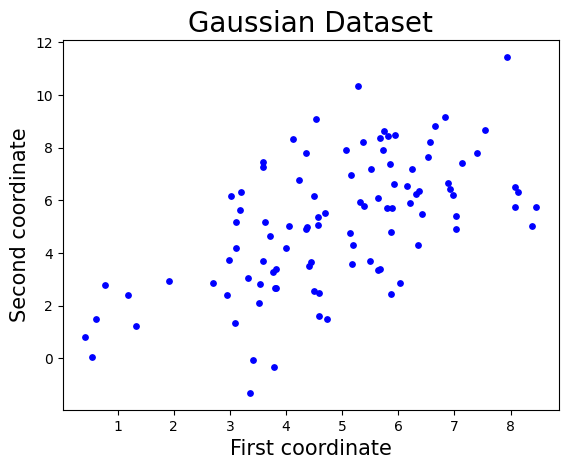

In [ ]:
# Sample one dataset with (correlated) Gaussian distribution
np.random.seed(0)

# Size of data
n_samples = 100
n_dim = 2

# Mean vector of the dataset
mean = 5 *  np.ones(n_dim) # the mean of the Gussaian vairbles x and y are both 5

# Sample covariance matrix from a Wishart distribution
temp = np.random.randn(n_dim, n_dim)
cov = temp@temp.T

X = np.random.multivariate_normal(mean, cov, size=n_samples)

plt.scatter(X[:, 0], X[:, 1], s=15, c='b')
plt.xlabel('First coordinate', size=15)
plt.ylabel('Second coordinate', size=15)
plt.title('Gaussian Dataset', size=20)
plt.show()

### Question 1:

Implement your own PCA algorithm.

In [5]:
class MyPCA(object):

    def __init__(self, n_components):
        self.n_components = n_components # n_component represent the k dimension (dim after reduction)
        
        self.mean = np.mean(X, axis=0) # axis = 0 represents the calculate the mean for each column, and store mean as self.mean


    def fit(self, X):
        # 1. center the data
        X_centered = X - self.mean
        # 2. calculate the covar matrix (S)
        # rowvar = False represents each column is a variable, calculate the covar matrix of data points
        cov_matrix = np.cov(X_centered, rowvar=False) 
        # 3. find the P and lamda
        eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

        #sort the eigenvalues in descending order
        sorted_index = np.argsort(eigen_values)[::-1] # descending order
        self.eigenvalues = eigen_values[sorted_index] # eigenvalues in descending order

        #similarly sort the eigenvectors -- eigenvectors in the same order as eigenvalues
        self.eigenvectors = eigen_vectors[:, sorted_index] # :, mean we order the columns, each column is an eigenvector
        
        # FIND THE FIRST K EIGENVECTORS CORESPONDING TO K LARGEST EIGENVALUES
        self.eigenvector_subset = self.eigenvectors[:, :self.n_components]

    # Project Xi onto the span of the eigenvectors_subset
    def transform(self, Z):
        # first center the data as we did in fit
        Z_centered = Z - self.mean
        proj = np.dot(Z_centered, self.eigenvector_subset)
        return proj

### Question 2

Apply PCA on the Gaussian dataset

In [6]:
pca = MyPCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

### Question 3

Verify that your transformed data are decorrelated. What do you observe?

In [ ]:
# calculated the corvariance matrix after projection (should be less correlated)
cov_pca = np.cov(X_pca, rowvar=False)
print("The covariance matrix after PCA transform", cov_pca)
# According to the result, the diagonal components explains the variance of the principal components
# the off-diagonal components are the covariance between the principal components, where all closed to 0.
# that mean our PCA works along our expectation, reduce the corelations between the pricipal components, and order by the variance of the components.

The covariance matrix after PCA transform [[ 7.78619202e+00 -7.28215362e-16]
 [-7.28215362e-16  1.67113936e+00]]


### Question 4

Visualize your transformed data after PCA.

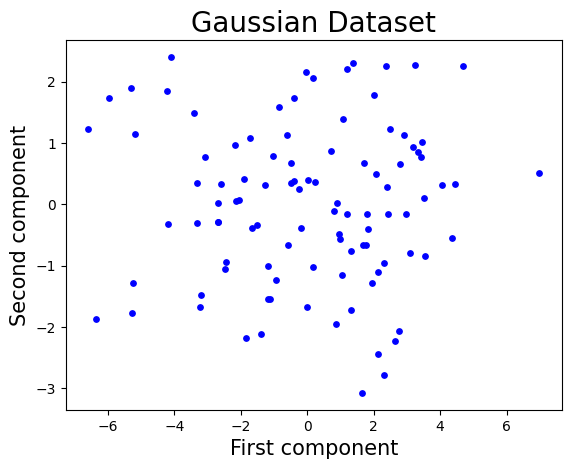

In [10]:
# to do
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=15, c='b')
plt.xlabel('First component', size=15)
plt.ylabel('Second component', size=15)
plt.title('Gaussian Dataset', size=20)
plt.show()

### Question 5

Compare your algorithm with the one in sklearn. You can check the covariance matrix of the transformed data. Is this the same than yours? What do you observe?

In [ ]:
from sklearn.decomposition import PCA

sk_pca = PCA(n_components=2)
X_sklearn_pca = sk_pca.fit_transform(X)
cov_sklearn = np.cov(X_sklearn_pca, rowvar=False)
print("The covariance matrix after sklearn PCA: ", cov_sklearn)

The covariance matrix after sklearn PCA:  [[7.78619202e+00 1.08623598e-14]
 [1.08623598e-14 1.67113936e+00]]


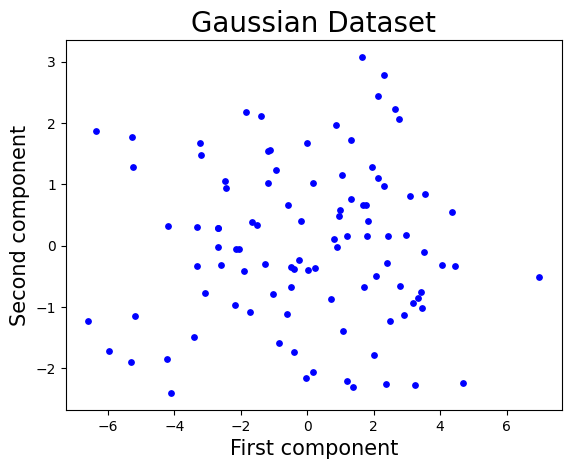

In [16]:
plt.scatter(X_sklearn_pca[:, 0], X_sklearn_pca[:, 1], s=15, c='b')
plt.xlabel('First component', size=15)
plt.ylabel('Second component', size=15)
plt.title('Gaussian Dataset', size=20)
plt.show()

From the results, myPCA implementation is completely consistent with sklearn PCA results, both achieving principal component decorrelation, and the variance explained by the principal components are similar. However, the covariance between the principal components obtained by sklearn PCA is closer to 0 than mine. This indicates that my PCA algorithm is correct and effective.

### Bonus Question

Compare the computational time of both algorithms, what do you observe? Why?

In [13]:
import time
start = time.time()
pca.fit(X)
X_pca = pca.transform(X)
print("MyPCA time:", time.time() - start)

start = time.time()
sk_pca.fit(X)
X_sklearn_pca = sk_pca.transform(X)
print("sklearn PCA time:", time.time() - start)

MyPCA time: 0.0
sklearn PCA time: 0.0


Due to the small sample size of this experiment, PCA calculations are very fast, causing the timing function to be unable to distinguish between the two running times (both are 0.0). In actual big data scenarios, the sklearn implementation is usually faster.

### Question 6

Let's apply the PCA on a (easy) classification real-world dataset. Apply PCA with 2 components and visualize the dataset with different colors for each class.

In [14]:
from sklearn import datasets

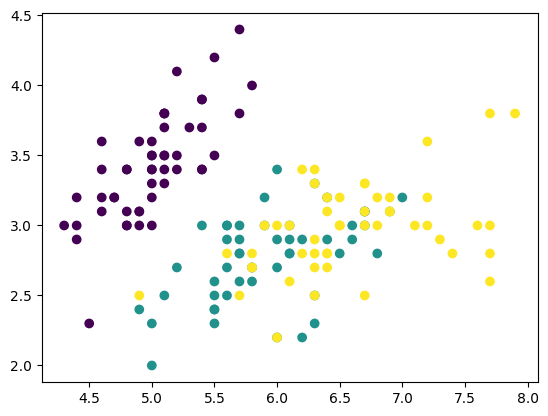

In [15]:
iris = datasets.load_iris()

X_iris = iris.data
y_iris = iris.target

plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris)
plt.show()

The covariance matrix after sklearn PCA:  [[4.22824171e+00 2.15070318e-14]
 [2.15070318e-14 2.42670748e-01]]


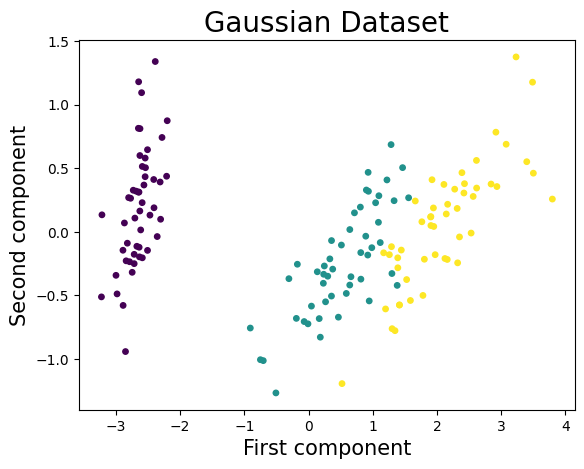

In [18]:
pca_model = PCA(n_components=2)
X_iris_pca = pca_model.fit_transform(X_iris)
cov_iris = np.cov(X_iris_pca, rowvar=False)
print("The covariance matrix after sklearn PCA: ", cov_iris)

plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], s=15, c=y_iris)
plt.xlabel('First component', size=15)
plt.ylabel('Second component', size=15)
plt.title('Gaussian Dataset', size=20)
plt.show()

### Question 7

Use a KNN algorithm and perform it on the dataset. Use different combinations of parameters using the GridSearchCV function.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'k_neighbors': [1, 3, 5, 7, 9]} # list of k values to try
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, params, cv=5) # use clf to find best k value (select k neighbors to classify)
clf.fit(X_iris, y_iris)
print("Best KNN score (raw data):", clf.best_score_)

Best KNN score (raw data): 0.9800000000000001


### Question 8

Use a PCA first and then apply again the classification algorithm. Observe the best score, is the PCA improve the results? Which explanation can you give?

In [ ]:
clf_pca = GridSearchCV(knn, params, cv=5)
clf_pca.fit(X_iris_pca, y_iris)
print("Best KNN score (raw data):", clf_pca.best_score_)


Best KNN score (raw data): 0.9666666666666668


From my result, the best KNN score decreased from 0.98 to 0.967. Possible reason is information loss.  
PCA dimension reduction only retains the first two principal components, discarding some of the original feature information, which prevents the model from utilizing all useful information, resulting in a slight decrease in accuracy.  
Although PCA can remove redundancy and correlation, if the discarded principal components contain information useful for classification, model performance will decrease.  

### Question 9

How features influence the first components (in term of variance)? You can answer this question by inspecting the weights in the first component.

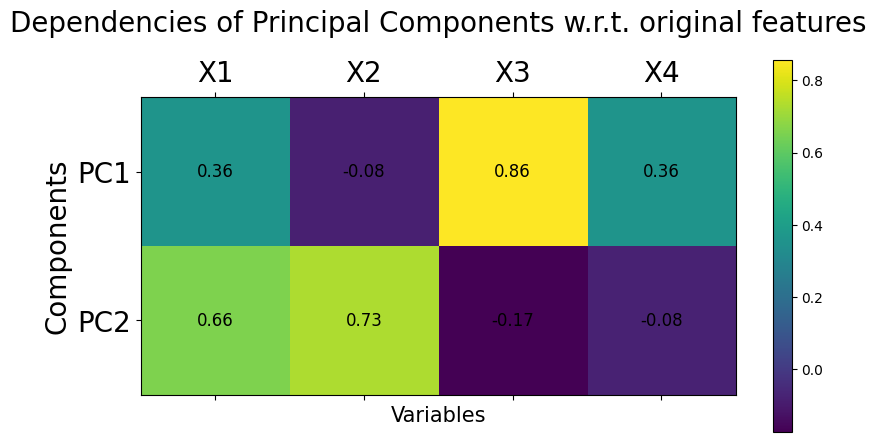

In [31]:
plt.matshow(pca_model.components_)
plt.ylabel('Components', size=20)
plt.xlabel('Variables', size=15)
for i in range(4):
    for j in range(2):
        plt.text(i, j, "%0.2f" % pca_model.components_[j, i], size=12, color='black', ha="center", va="center")
plt.colorbar()
xlabels = ['X1', 'X2', 'X3', 'X4']
plt.xticks(range(4), xlabels, size=20)
ylabels = ['PC1', 'PC2']
plt.yticks(range(2), ylabels, size=20)
plt.title('Dependencies of Principal Components w.r.t. original features', size=20, pad=20)
plt.show()

The first principal component (PC1) is primarily determined by X3 (largest variance 0.86), while the second principal component (PC2) is primarily determined by X2 and X1 (variance of 0.66 and 0.73).  
These weights reflect the contribution of each original feature to the variance of the principal component. The larger the absolute value of the weight, the greater the influence of that feature on the principal component.


### Bonus Question

Create a pipeline with KNN, classification trees, RandomForest and SVM. Perform the Question 7/8 for these 4 classifiers. What do you observe?

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# define 4 clssifiers and their parameters
classifiers = {
    'KNN': (KNeighborsClassifier(), {'clf__n_neighbors': [1, 3, 5, 7, 9]}),
    'DecisionTree': (DecisionTreeClassifier(), {'clf__max_depth': [2, 3, 4, 5, 6]}),
    'RandomForest': (RandomForestClassifier(), {'clf__n_estimators': [10, 50, 100]}),
    'SVM': (SVC(), {'clf__C': [0.1, 1, 10]})
}

print("Raw data results:")
for name, (model, params) in classifiers.items():
    pipe = Pipeline([
        ('clf', model)
    ])
    grid = GridSearchCV(pipe, params, cv=5)
    grid.fit(X_iris, y_iris)
    print(f"{name} best score (raw data): {grid.best_score_:.3f}")

print("\nPCA (2 components) results:")
for name, (model, params) in classifiers.items():
    pipe = Pipeline([
        ('pca', PCA(n_components=2)),
        ('clf', model)
    ])
    grid = GridSearchCV(pipe, params, cv=5)
    grid.fit(X_iris, y_iris)
    print(f"{name} best score (PCA): {grid.best_score_:.3f}")

Raw data results:
KNN best score (raw data): 0.980
DecisionTree best score (raw data): 0.967
RandomForest best score (raw data): 0.967
SVM best score (raw data): 0.980

PCA (2 components) results:
KNN best score (PCA): 0.967
DecisionTree best score (PCA): 0.947
RandomForest best score (PCA): 0.940
SVM best score (PCA): 0.953


**In this experiment, all four classifiers (KNN, decision tree, random forest, and SVM) showed a decrease in accuracy after PCA dimension reduction to two dimensions compared to the original data.**  
PCA dimension reduction only retained the first two principal components among 4 features, discarding some of the original feature information, which prevented the model from utilizing all useful information and led to a decrease in classification performance.

### Question 10

Time to apply PCA on a high dimensional dataset.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X_d = digits.data
y_d = digits.target

print(X_d.shape)

# X_d has 1797 samples and each Xi with a dimension of 64

(1797, 64)


### Question 11

Now, you will have to reduce the dimension. The main question is: how to choose the number of components? Propose a method to determine a relevant number of components to keep.

By observing the cumulative variance contribution curve, you can select an appropriate number of principal components (such as 95% or 99%) that retains most of the information while effectively reducing the dimension. Here I choose 95% of the accumulated variance and the coresponding number of components are 28.

Number of components for 95% variance: 28


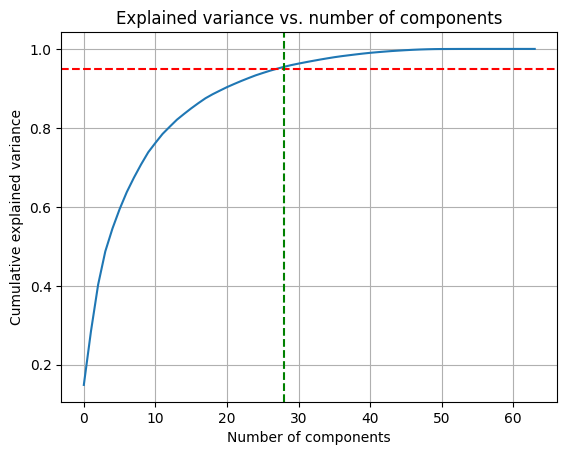

In [38]:
pca_digits = PCA().fit(X_d)
explained_var = np.cumsum(pca_digits.explained_variance_ratio_)

# find the number of components for 95% variance
n_components_95 = np.argmax(explained_var >= 0.95) 
print(f"Number of components for 95% variance: {n_components_95}")

plt.plot(explained_var)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance vs. number of components')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components_95, color='g', linestyle='--')
plt.grid()
plt.show()

### Question 12

Run PCA on the handwritten digits data reducing its dimension from 64 to 2. Visualise digits in dimension two. Is dimension two seems enough to represent keep information of data?

 Based on the visualization results after reducing PCA to two dimensions, samples of different digits show some distribution distinctions in the two-dimensional space, but there is still significant overlap. Some digits form more distinct clusters, but the boundaries between some categories are unclear.  
 Using only the first two principal components (2D) is insufficient to completely distinguish all digit categories.

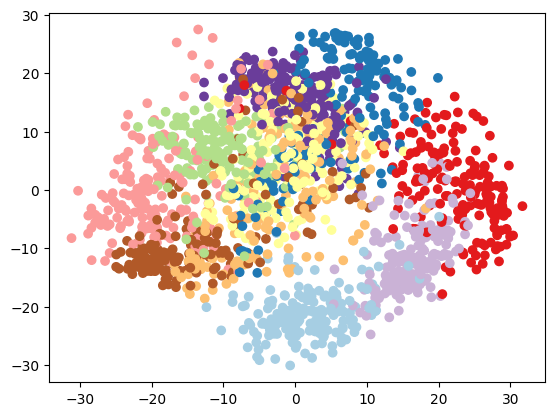

In [ ]:
from matplotlib import cm

vis = PCA(n_components=2).fit_transform(X_d)
colors = cm.Paired(np.linspace(0., 1., 10)) # list of 10 colors

colors_all = colors[digits.target]
plt.scatter(vis[:, 0], vis[:, 1], c=colors_all)
plt.show()

### Question 13

Perform a KNN algorithm on the raw data and on the projected data. What do you observe in terms of accuracy?

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("KNN accuracy (raw):", knn.score(X_test, y_test))

X_d_pca2 = PCA(n_components=2).fit_transform(X_d)
X_train_pca, X_test_pca, _, _ = train_test_split(X_d_pca2, y_d, test_size=0.3, random_state=0)
knn.fit(X_train_pca, y_train)
print("KNN accuracy (PCA 2D):", knn.score(X_test_pca, y_test))

# Along with the conclusion in Question 12, the accury score after PCA demension reduction is much lower than do the KNN on the raw data.
# Indicating this demension reduction lost a lot of information.

KNN accuracy (raw): 0.987037037037037
KNN accuracy (PCA 2D): 0.5796296296296296


### Bonus Question

Apply other reduction dimension methods (not seen in class) such as Kernel PCA (choose one kernel), Independant Component Analysis (ICA) and t-SNE. Visualize their projection in dimension two.

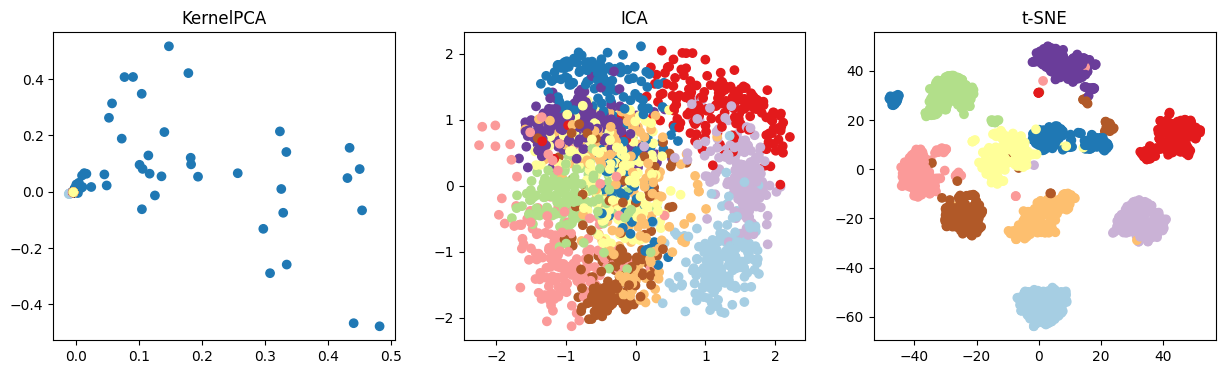

In [ ]:
from sklearn.decomposition import FastICA, PCA, KernelPCA
from sklearn.manifold import TSNE

# Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_d)

# ICA
ica = FastICA(n_components=2, random_state=0)
X_ica = ica.fit_transform(X_d)

# t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_d)

# visualize
plt.figure(figsize=(15,4))
for i, (data, title) in enumerate(zip([X_kpca, X_ica, X_tsne], ['KernelPCA', 'ICA', 't-SNE'])):
    plt.subplot(1, 3, i+1)
    plt.scatter(data[:, 0], data[:, 1], c=colors_all)
    plt.title(title)
plt.show()

# From the results, clearly t-SNE is the best method to seprete the data accroding to their features.